<a href="https://colab.research.google.com/github/jumanadyab/Possom-Prediction/blob/main/Possom%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)# Importing libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['possum.csv']))
df.head()

# Droping unnecessary columns

In [ ]:
to_drop=['site','case','taill','belly','chest','footlgth']

In [ ]:
df.drop(to_drop , axis=1, inplace=True)

In [ ]:
df.shape
df.head()

,Pop,sex,age,hdlngth,skullw,totlngth,earconch,eye
0,Vic,m,8.0,94.1,60.4,89.0,54.5,15.2
1,Vic,f,6.0,92.5,57.6,91.5,51.2,16.0
2,Vic,f,6.0,94.0,60.0,95.5,51.9,15.5
3,Vic,f,6.0,93.2,57.1,92.0,52.2,15.2
4,Vic,f,2.0,91.5,56.3,85.5,53.2,15.1


# Dealig with null values:

In [ ]:
##serching for null values and counting them
df.isnull().sum()

Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
earconch    0
eye         0
dtype: int64

In [ ]:
#Drop missing values
df.interpolate(inplace=True)

In [ ]:
df.isnull().sum()

Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
earconch    0
eye         0
dtype: int64

# Dealing with Categorical data 

In [ ]:
col=['Pop','sex','age','hdlngth','skullw','totlngth','earconch','eye']
numeric_col = ['age','hdlngth','skullw','totlngth','earconch','eye']
categorical_col = ['sex', 'Pop']

In [ ]:
#by using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
one= OrdinalEncoder()

df[categorical_col]=one.fit_transform(df[categorical_col])
df.head()

,Pop,sex,age,hdlngth,skullw,totlngth,earconch,eye
0,0.0,1.0,8.0,94.1,60.4,89.0,54.5,15.2
1,0.0,0.0,6.0,92.5,57.6,91.5,51.2,16.0
2,0.0,0.0,6.0,94.0,60.0,95.5,51.9,15.5
3,0.0,0.0,6.0,93.2,57.1,92.0,52.2,15.2
4,0.0,0.0,2.0,91.5,56.3,85.5,53.2,15.1


In [ ]:
#By using lableEncoder 
#from sklearn import preprocessing
#lable = preprocessing.LabelEncoder()


#df['sex']=lable.fit_transform(df['sex'])
#df['Pop']=lable.fit_transform(df['Pop'])

#df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pop       104 non-null    float64
 1   sex       104 non-null    float64
 2   age       104 non-null    float64
 3   hdlngth   104 non-null    float64
 4   skullw    104 non-null    float64
 5   totlngth  104 non-null    float64
 6   earconch  104 non-null    float64
 7   eye       104 non-null    float64
dtypes: float64(8)
memory usage: 6.6 KB


In [ ]:
df.columns

Index(['Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'earconch',
       'eye'],
      dtype='object')

# Dealing with outliers

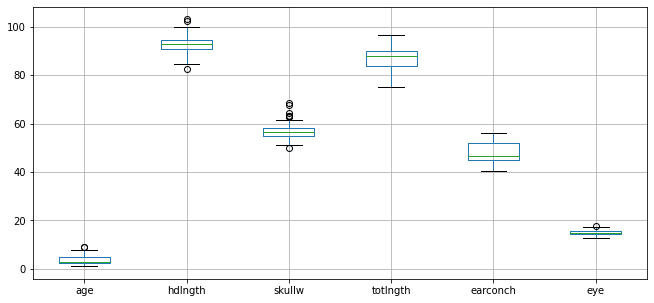

In [ ]:
#using plotbox to find the outliers
df.boxplot(numeric_col,figsize=(11,5))
#skullw column has alot of outliers

In [ ]:
Q1=df['skullw'].quantile(0.25)
Q3=df['skullw'].quantile(0.75)
#we have used quantile() method to calculate the values of Q1 and Q3
#or we can use describe() method

#calculating the IQR
IQR= Q3- Q1
IQR

3.125

In [ ]:
#getting the values which are not in outlier range
df=df[~((df['skullw'] <(Q1-1.5*IQR)) | (df['skullw'] > (Q3+1.5*IQR)))]

In [ ]:
df.shape

(96, 8)

# MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale_var=['hdlngth', 'skullw','age', 'totlngth','earconch', 'eye']
scaler=MinMaxScaler()
df[scale_var]=scaler.fit_transform(df[scale_var])
df

,Pop,sex,age,hdlngth,skullw,totlngth,earconch,eye
0,0.0,1.0,0.875,0.666667,0.895238,0.651163,0.893082,0.48
1,0.0,0.0,0.625,0.574713,0.628571,0.767442,0.685535,0.64
2,0.0,0.0,0.625,0.660920,0.857143,0.953488,0.729560,0.54
3,0.0,0.0,0.625,0.614943,0.580952,0.790698,0.748428,0.48
4,0.0,0.0,0.125,0.517241,0.504762,0.488372,0.811321,0.46
...,...,...,...,...,...,...,...,...
99,1.0,1.0,0.000,0.402299,0.476190,0.302326,0.408805,0.40
100,1.0,1.0,0.000,0.350575,0.352381,0.348837,0.484277,0.24
101,1.0,0.0,0.625,0.568966,0.380952,0.651163,0.320755,0.04
102,1.0,1.0,0.375,0.517241,0.400000,0.348837,0.352201,0.52


# Spliting the data 

In [ ]:
#spliting to train and test , in this model we are going to predict hdlngth
X=df.drop("hdlngth", axis=1, )
y=df[['hdlngth']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

# Building the model

In [ ]:
#importing RandomForestRegressor from sklearn library
from sklearn.ensemble import RandomForestRegressor 
#building the regression model
rf= RandomForestRegressor(n_estimators=250)

In [ ]:
#fitting the training data into the model
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=250)

## Training the model

In [ ]:
#creating a variale that saves the predicted data 
y_pred_r=rf.predict((X_test))
y_pred_r

array([91.6296, 91.8644, 97.2632, 93.4688, 89.9176, 96.1084, 95.7208,
       90.1048, 97.3972, 91.422 , 92.8448, 89.4396, 99.4252, 93.1344,
       92.4172, 90.274 , 93.9768, 95.2972, 91.7848, 93.8516, 86.2904])

# Evaluating the Model

In [ ]:
#using mse and r2
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_r)
#rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_r)

print('r2:', r2)
print("mse:", mse)
#print('rmse:', rmse) //0.1303718
accuracy = rf.score(X_test, y_test)
print ("Accuracy in the test data", accuracy*100, "%")

r2: 0.5851149053865071
mse: 0.016781051023913356
Accuracy in the test data 58.51149053865071 %


In [ ]:
#counting the CPU ,available RAM and the available memory
#import psutil

#print('percentage of used CPU: ',psutil.cpu_percent(),'%')

#an object
#psutil.virtual_memory()

# you can convert that object to a dictionary 
#dict(psutil.virtual_memory()._asdict())

#print('percentage of used RAM: ',psutil.virtual_memory().percent,'%')
#print('percentage of available memory: ',psutil.virtual_memory().available * 100 / psutil.virtual_memory().total,'%')

n_estimators       | r2 score| mse score|  overall memory (GB) | overall Disk (GB) |
-------------------|----------------|-------------|--------------------|--------------------
200   | 0.579  | 0.016  |     1.49  | 38.34

## Extra Visualization

In [ ]:
import matplotlib.pyplot as plt

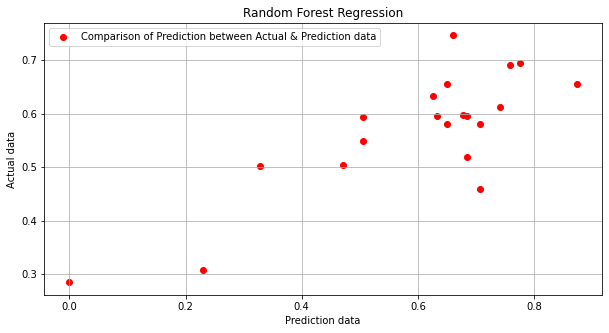

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_r, color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.show()

In [ ]:
df_feature_importance = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
skullw,0.414792
totlngth,0.411258
age,0.062778
eye,0.053143
earconch,0.045503
sex,0.007593
Pop,0.004933


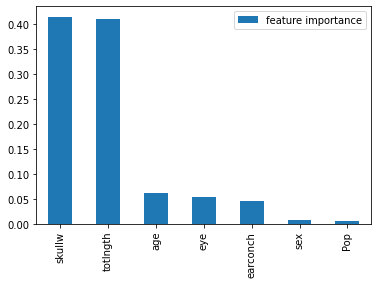

In [ ]:
df_feature_importance.plot(kind='bar');